# Stable Diffusion Inference using HuggingFace

This notebook aims to show you how to run a Stable Diffusion model using the `diffusers` library from HuggingFace.

More information in: https://huggingface.co/docs/diffusers/en/quicktour

### Check that the GPU is working

In [2]:
! nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


### Install Diffusers library

Here is the command to install diffusers, transformers, torch and accelerate libs:

In [ ]:
! pip install --upgrade diffusers==0.30.3 accelerate==0.34.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

### Import libraries

In [3]:
import os
import torch
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

## Create an output folder

In [4]:
OUTPUT_DIR = 'lab_2_generated_outputs/'

if not os.path.isdir(OUTPUT_DIR): # Check if output directory exists
    os.makedirs(OUTPUT_DIR)       # If folder doesn't exist, then create it

---
# Text-to-Image generation

## Stable Diffusion v1.4 and v1.5

Stable Diffusion models in HuggingFace:
- https://huggingface.co/CompVis/stable-diffusion-v1-4   (images 512x512)
- https://huggingface.co/runwayml/stable-diffusion-v1-5  (images 512x512)


In [5]:
# Model parameters ----------------------------------------
MODEL_ID = "CompVis/stable-diffusion-v1-4"
# MODEL_ID = "runwayml/stable-diffusion-v1-5"

# GPU parameters  ----------------------------------------
DEVICE = "cuda"  # Use "cuda" to run on GPU

## Select Scheduler

More info about schedulers: https://github.com/huggingface/diffusers/tree/main/src/diffusers/schedulers

In [7]:
from diffusers import (
    DDIMScheduler,
    LMSDiscreteScheduler,
    PNDMScheduler,
    EulerDiscreteScheduler,
    EulerAncestralDiscreteScheduler,
)

# Select one Scheduler ----------------------------------------
SCHEDULER = EulerAncestralDiscreteScheduler # This scheduler is called "Euler Ancestral"

## Pipeline creation with a specific scheduler

### This can take a few minutes... be patient :)

In [8]:
from diffusers import DiffusionPipeline

scheduler = SCHEDULER.from_pretrained(MODEL_ID, subfolder="scheduler")
pipe = DiffusionPipeline.from_pretrained(
                      pretrained_model_name_or_path = MODEL_ID,
                      scheduler = scheduler,
                      # torch_dtype=torch.float16,
                      # safety_checker = None,   NSFW = NOT SAFE FOR WORK
            )

pipe = pipe.to(DEVICE) # Send to GPU

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Extra parameters
- `safety_checker`: this parameter is to filter out unsafe content from generated images. If enabled it returns a completely black image when the generated image violates certain rules, the "NSFW" (not safe for work) concept embeddings generated from CLIP

- `torch_dtype` : if you are running the code locally and with GPU less than 10GB then you must use float16 precision instead of bigger precisions.

## Let's play!! Generate one image

  0%|          | 0/50 [00:00<?, ?it/s]

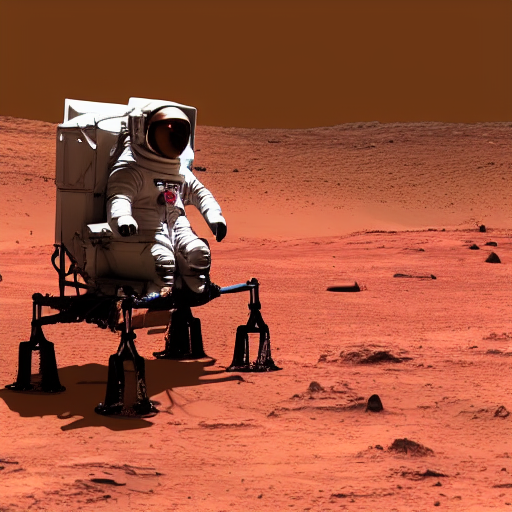

In [10]:
# Write the prompt or instructions for generating the image
prompt = "a photo of a disabled astronaut riding a horse on mars"

# Generate the image
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=50, height=512, width=512).images[0]

# Save the image
image.save(f"{OUTPUT_DIR}/astronaut_rides_horse.png")

# Show the image
image

## Using SEED
You will have seen that if you run the previous cell it generates a completely new image and overwrites the one you had already saved! :(

To avoid this, it is best to set a seed.

  0%|          | 0/20 [00:00<?, ?it/s]

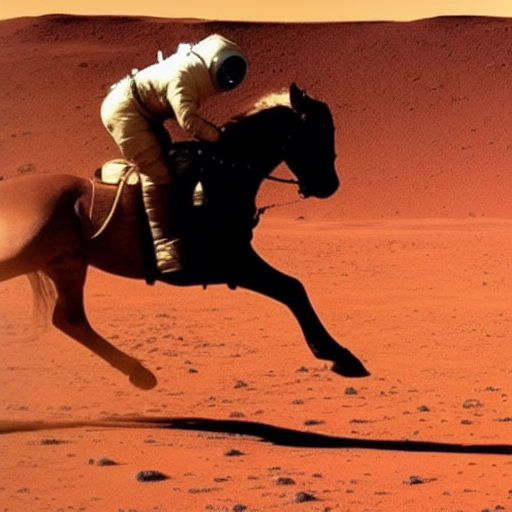

In [ ]:
INFERENCE_SEED = 1122334455

# Set seed
custom_generator = torch.Generator(device='cuda').manual_seed(INFERENCE_SEED)

# And then add "generator=custom_generator" as pipe() inference parameter
image = pipe(prompt, generator=custom_generator, guidance_scale=7.5, num_inference_steps=20, height=512, width=512).images[0]
image

Now we see that it always generates the same image even if you repeat the execution.

## Generator method

This method will help you repeat the generation process easily

In [ ]:
def generate_image(pipe, prompt, steps=50, h=512, w=512, guidance_scale=7, strength=0.75, seed=custom_generator, save_image=True):
    print(prompt)
    image = pipe(prompt, num_inference_steps=steps, height=h, width=w, guidance_scale=guidance_scale, strength=strength, generator=seed)["images"][0]
    display(image)
    if save_image == False:
        outfilename = f'{OUTPUT_DIR}/{INFERENCE_SEED}_1_' + prompt.replace(' ', '_') + '.png'
        image.save(outfilename)


## Generate image

In [ ]:
prompt = "a photo of an astronaut riding a horse on mars"
generate_image(pipe, prompt)

### Image Size

In my machine there is a big GPU that can generate images larger than 2048x2048... but a memory error occurs if you try to run it in smaller GPUs.

`Experiment`: try to find the limit of your GPU. But... as you can see, the model does not generate the images properly if you ask it to generate at a larger/smaller size than the one it is trained to generate.

In [ ]:
generate_image(pipe, prompt, h=256, w=256)

In [ ]:
generate_image(pipe, prompt, h=1024, w=1024)

### Prompt Enginering

By improving the prompt, better results can be achieved. The task is to investigate which prompts work best and also to find out the differences between models.



In [ ]:
prompt = "a female warrior"
generate_image(pipe, prompt)

In [ ]:
prompt = "a portrait of a female warrior, by greg rutkowski, highly detailed, HQ, 4K, symmetrical, trending on artstation, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting"
generate_image(pipe, prompt)

### Guidance Scale

`"guidance_scale"` is a parameters related to how close the image should be to the prompt. However, very low/high values may not work correctly. Here are some examples to show you how it affects generation:

In [ ]:
prompt = "overgrown foliage taking over an abandoned robot body, close - up, biopunk, bokeh, beautiful, lens flare, emotional, sweet, flowers, detailed, picture, trending on artstation, award - winning, shiny, golden"

In [ ]:
generate_image(pipe, prompt, guidance_scale=2)
generate_image(pipe, prompt, guidance_scale=10)
generate_image(pipe, prompt, guidance_scale=20)

### Number of Inference Steps

Increasing the number of steps may improve image quality, but it will take longer ⏰ to generate the image.

There are models that work well with 50-100 steps and other models that reach the maximum quality with 20 steps.

In [ ]:
prompt = "a portrait of Elon Musk as superman, realistic portrait, symmetrical, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, cinematic lighting, art by artgerm and greg rutkowski"
generate_image(pipe, prompt, steps=10, guidance_scale=13, h=512, w=512)
generate_image(pipe, prompt, steps=100, guidance_scale=13, h=512, w=512)

### Negative Prompt

`Experiment (optional)` : Search for information on `negative prompts` and how to use it with HuggingFace diffusers library.

---

# ADVANCE BIG MODELS
More modern and powerful models 🦾🤖.

# 1. Restart colab and run
You'd better restart the Colab runtime and run from this point.

In [ ]:
! pip install diffusers==0.32.1 # install newest version of diffusers lib

## 2. HuggingFace token and other model permissions

Sometimes there are models that require you to have a Hugging Face account and to log in using your token.

This way they can check that it is you and not a bot or a stranger using the model.

Log in to Hugging Face and manage your token here: https://huggingface.co/settings/tokens

In [ ]:
# Login with a HF token with gated access permission
! huggingface-cli login

In addition, there are models that you will have to go to their HuggingFace website to **fill out a short form to accept their license**.
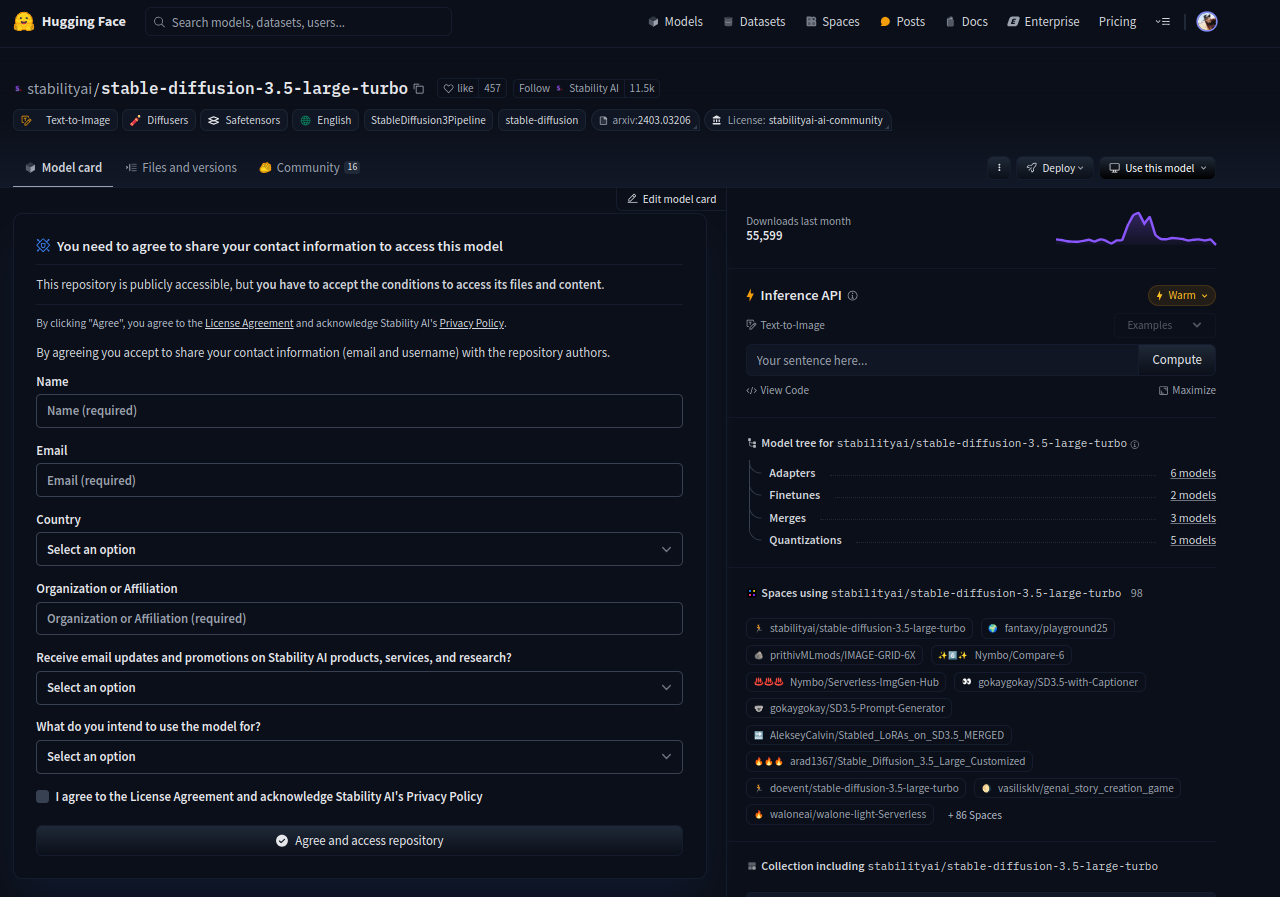

## 3. Run advance models!!

- To create the pipelines you will have to use the specific imports from difusers library, for example: `StableDiffusion3Pipeline`, `AutoPipelineForText2Image`...etc
- It can take a while to create the pipelines, they are large models! so be patient ⏳
- Generation also takes longer ⏳⏳⏳

### Model: **Stable Diffusion XL Turbo**
- Model page: https://huggingface.co/stabilityai/sdxl-turbo
- This model has a different architecture. To run it you can set the `num_inference_steps=1` and the `guidance_scale=0.0`

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda")

prompt = "A cinematic shot of a baby racoon wearing an intricate italian priest robe."
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image

## Other big models that do not perform well in a Colab

To run these models it is better to have environments or machines with more capacity and more GPU memory.

### Model: **Stable Diffusion 2**
- Model page: https://huggingface.co/stabilityai/stable-diffusion-2
- Model page: https://huggingface.co/stabilityai/stable-diffusion-2-1

- Run all the above code but choose the new models and indicate that the size of the images is `768x768` or larger.

In [ ]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1").to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
generate_image(pipe, prompt, h=768, w=768) # remember change the image size

### Model: **Stable Diffusion 3 Medium**
- Model page: https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers

In [ ]:
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers").to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, num_inference_steps=28, guidance_scale=7.0).images[0]
image

### Model: **Stable Diffusion 3 Large Turbo**
- Model page: https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers
- To create the pipeline you need to use the specific method of the difusers library `StableDiffusion3Pipeline`.
- It can take a while to create the pipeline, be patient :) it's a big model! (~16Gb)

In [ ]:
from diffusers import StableDiffusion3Pipeline
import torch

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large-turbo", torch_dtype=torch.bfloat16).to("cuda")

prompt = "A capybara holding a sign that reads Hello Fast World"
image = pipe(
    prompt,
    num_inference_steps=4,
    guidance_scale=0.0,
).images[0]

image

### Model: **Flux 1**
- Model page: https://huggingface.co/black-forest-labs/FLUX.1-dev
- To use this model you need to accept the access conditions. Search "accept" button in model page
- To create the pipeline you need to use the specific method of the difusers library `FluxPipeline`.
- This is a very big model! (~25Gb)

In [ ]:
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload() # save some VRAM by offloading the model to CPU. Remove this if you have enough GPU power

prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]

---

# Image-to-Image text guided generation
https://huggingface.co/docs/diffusers/en/using-diffusers/img2img

In [ ]:
import requests
from PIL import Image
from io import BytesIO

# let's download an initial image
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

prompt = "A fantasy landscape"

pipe = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")
image = pipe(prompt=prompt, init_image=init_image, strength=0.75, guidance_scale=7.5, num_inference_steps=100, height=512, width=768)["images"][0]

# Print and show results:
print("")
print("This is the original image:")
display(init_image)
print("")
print(f'The textual prompt is: ""{prompt}""')
print("")
print("And this is the generated image:")
display(image)

---

# Text-to-Video generation with AnimateDiff

Did you know that you can also generate video or GIFs with Stable Diffusion?

`Experiment (optional)`: Find out how to generate your own GIFs with the diffusers library and AnimateDiff
https://huggingface.co/docs/diffusers/en/api/pipelines/animatediff#text-to-video-generation-with-animatediff

---